In [53]:
from mazeAgentUtils import * 
%load_ext autoreload
%autoreload 2



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [192]:
agent = MazeAgent(mazeType='oneRoom', dx=0.05, policy='raudies',dt=0.05)

agent.walls['barrier1'] = np.array([[[0.5,0.2],[0.5,0.8]]])

agent.runRat(10000,learnSR=True)

  0%|          | 0/200000 [00:00<?, ?it/s]

array([0.025, 0.075, 0.125, 0.175, 0.225, 0.275, 0.325, 0.375, 0.425,
       0.475, 0.525, 0.575, 0.625, 0.675, 0.725, 0.775, 0.825, 0.875,
       0.925, 0.975])

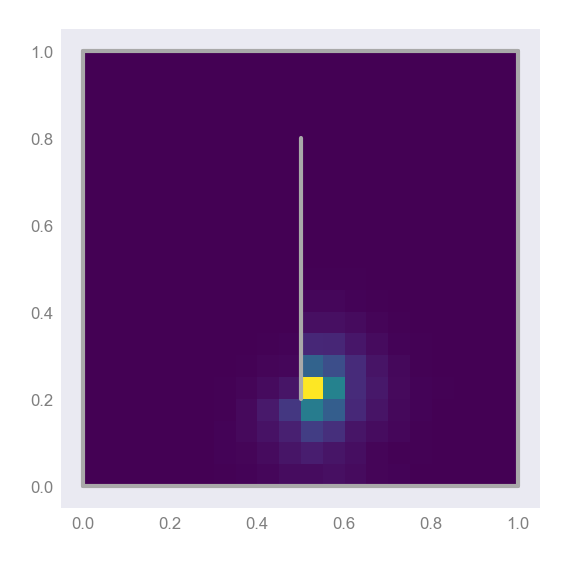

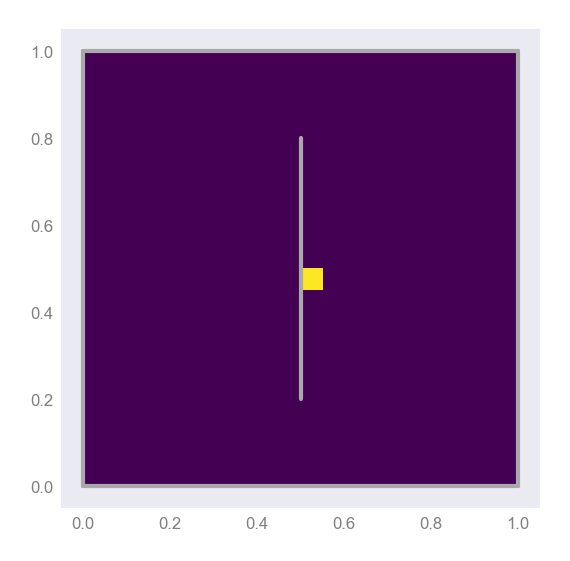

In [196]:
#fig, ax = agent.plotMovementHistory()
fig, ax = agent.plotPlaceField(310)
saveFigure(fig)
#fig, ax = agent2.plotPlaceField(270)
agent.plotStateVector(pos=[0.50001,0.5])
agent.xArray

In [86]:
agent.posHist[0][:,0]


array([0.05      , 0.05113137, 0.05230016, ...,        nan,        nan,
              nan])

In [94]:
import pickle
with open('/tmp/data.pkl', 'rb') as f:
        (M, prevState, currentState, gamma,  alpha) = pickle.load(f)
        %time delta = prevState + gamma*(M @ currentState) - (M @ prevState)

In [95]:
%time delta = prevState + gamma*(M @ currentState) - (M @ prevState)

CPU times: user 71.6 ms, sys: 1.29 ms, total: 72.9 ms
Wall time: 18.1 ms


[0.025 0.075 0.125 0.175 0.225 0.275 0.325 0.375 0.425 0.475 0.525 0.575
 0.625 0.675 0.725 0.775 0.825 0.875 0.925 0.975 1.025 1.075 1.125 1.175
 1.225 1.275 1.325 1.375 1.425 1.475 1.525 1.575 1.625 1.675 1.725 1.775
 1.825 1.875 1.925 1.975]


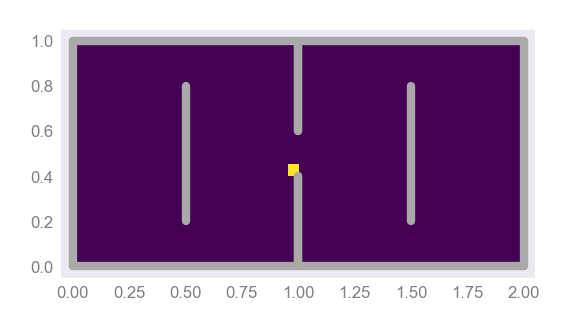

In [42]:
agent.plotStateVector(pos=[0.99,0.41])

In [49]:
agent = MazeAgent(dt=0.05, dx=0.05, v=0.1, numRooms=1, roomSize=1, policy='randomWalk')
agent.alpha = 0.3
agent.gamma = 0.999
agent.dx = 0.1
agent.walls['barrier'] = np.array([[[0.3,0.7],[0.7,0.3]]])
for i in tqdm(range(500000)):
    agent.movementPolicyUpdate()
    agent.TDLearningStep()

  0%|          | 0/500000 [00:00<?, ?it/s]

KeyboardInterrupt: 

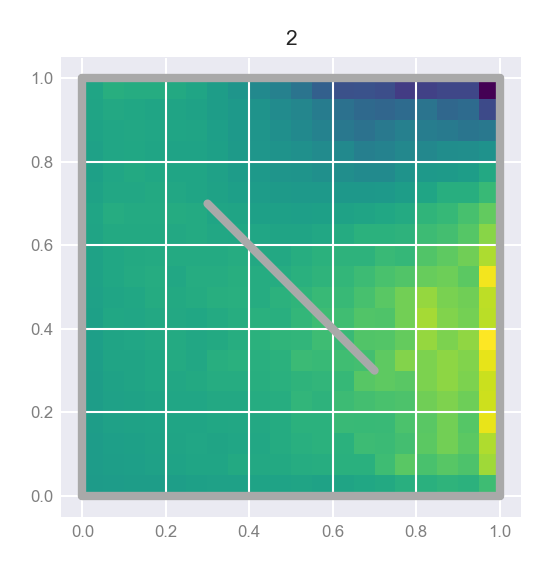

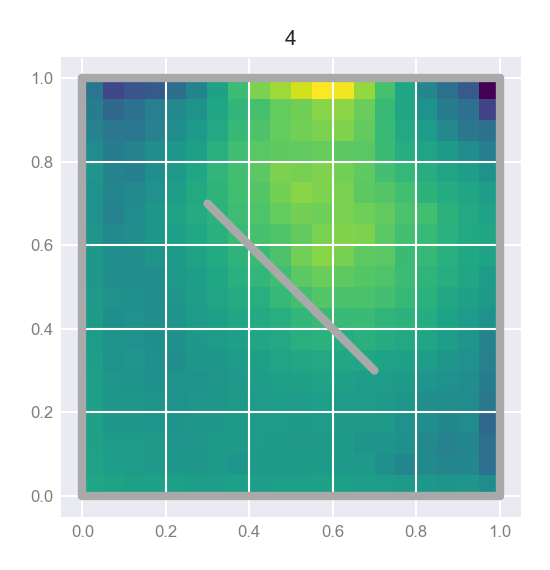

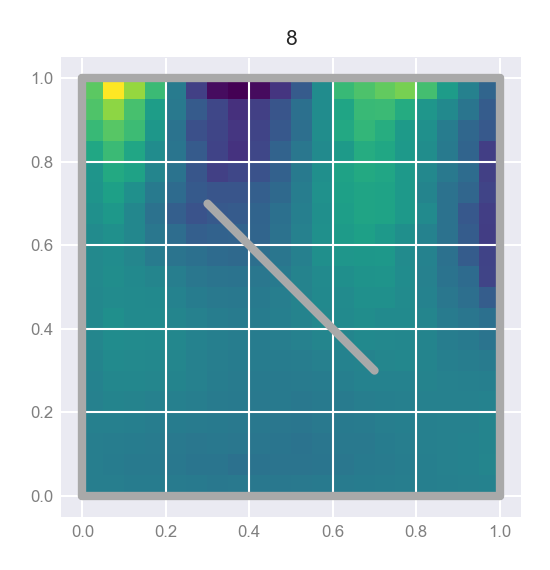

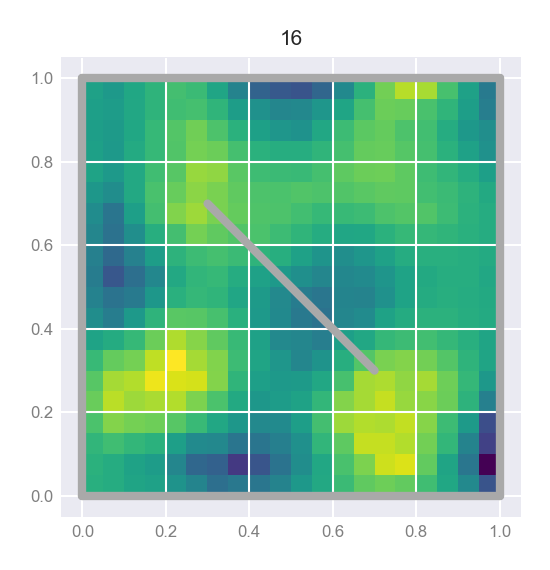

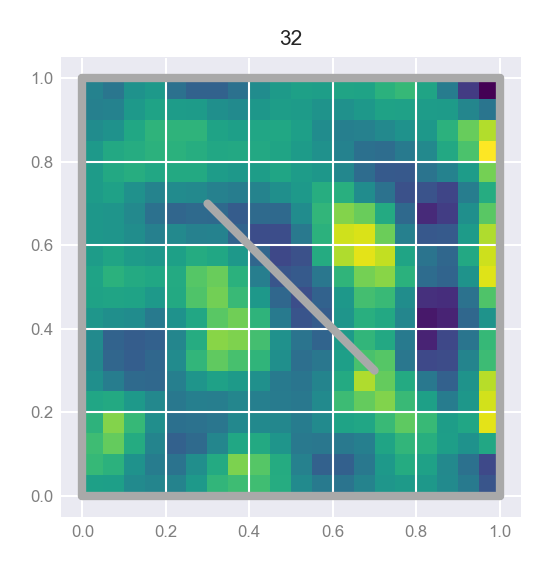

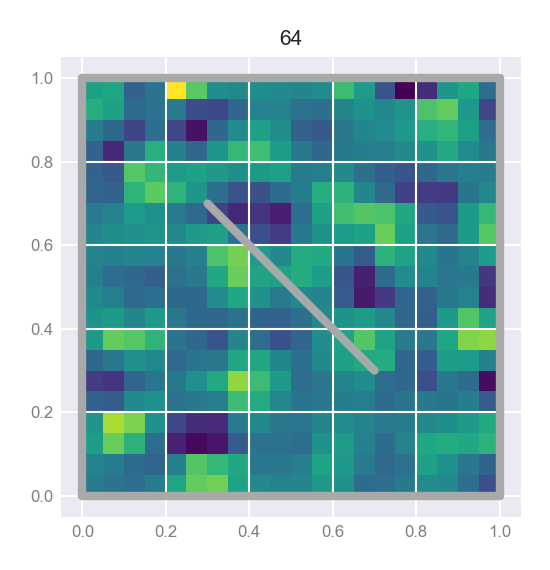

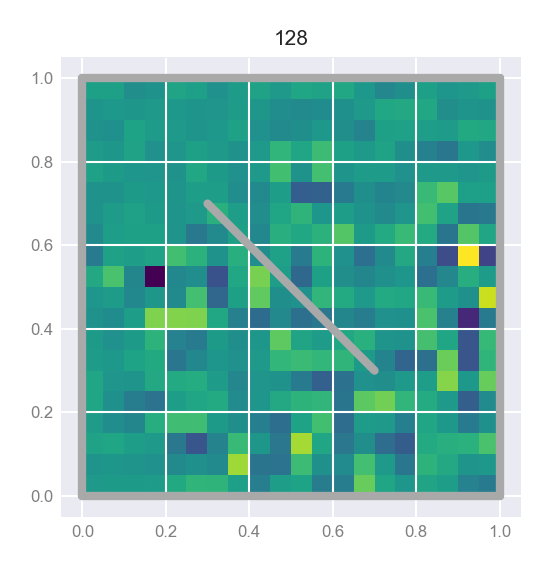

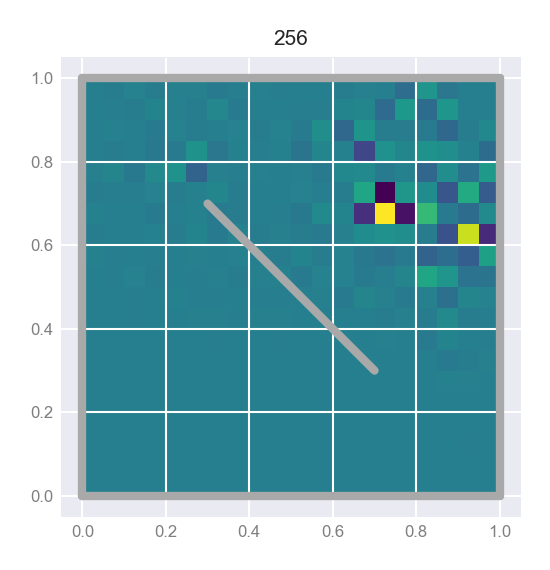

In [51]:
for i,n in enumerate([2,4,8,16,32,64,128,256]):
    fig, ax = agent.plotGridField(n)
    ax.set_title("%s"%n)
    saveFigure(fig,"%g"%n)

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

'./figures/210415/_1627.png'

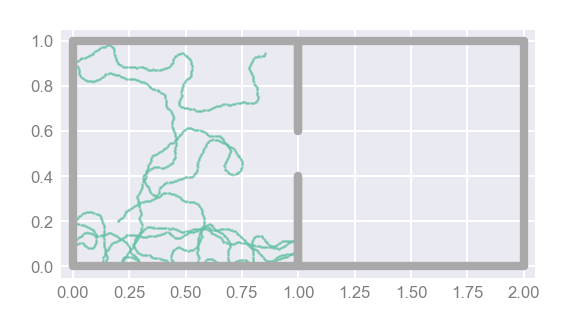

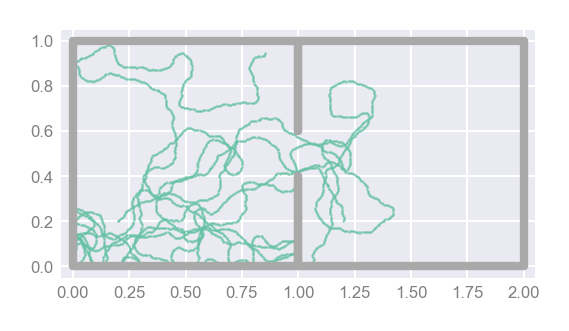

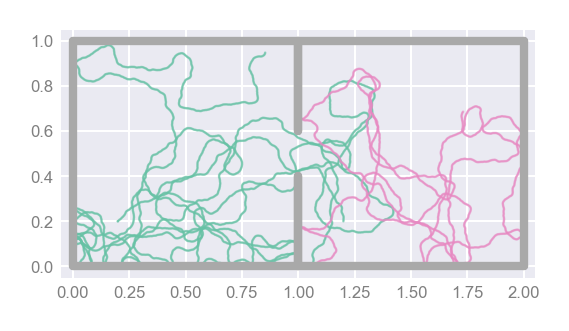

In [55]:
agent = MazeAgent(dt=0.05, dx=0.05, v=0.1, numRooms=2, roomSize=1, policy='randomWalk')
agent.doorsClosed = True

agent.pos = np.array([0.2,0.2])
for i in tqdm(range(2000)):
    agent.movementPolicyUpdate()
fig, ax = agent.plotHistory()
saveFigure(fig)

agent.pos = np.array([1.2,0.2])
for i in tqdm(range(2000)):
    agent.movementPolicyUpdate()
fig, ax = agent.plotHistory()
saveFigure(fig)

agent.doorsClosed = False
for i in tqdm(range(2000)):
    agent.movementPolicyUpdate()

color = ['C0']*4001 + ['C3']*2000
fig, ax = agent.plotHistory(color)
saveFigure(fig)

In [19]:
agent.stateVec_asMatrix


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [84]:
A  = np.random.randn(5000,5000)
b = np.random.randn(5000)
%time A @ b + A @ b


CPU times: user 68.7 ms, sys: 608 µs, total: 69.3 ms
Wall time: 17.6 ms


array([ 59.92398103,  86.92481738, 188.85609103, ..., 183.96527133,
        44.72134599,  89.95201578])

In [112]:
import numpy as np

In [114]:
np.__config__.show()

blas_mkl_info:
    libraries = ['mkl_rt', 'pthread']
    library_dirs = ['/Users/tomgeorge/anaconda3/lib']
    define_macros = [('SCIPY_MKL_H', None), ('HAVE_CBLAS', None)]
    include_dirs = ['/Users/tomgeorge/anaconda3/include']
blas_opt_info:
    libraries = ['mkl_rt', 'pthread']
    library_dirs = ['/Users/tomgeorge/anaconda3/lib']
    define_macros = [('SCIPY_MKL_H', None), ('HAVE_CBLAS', None)]
    include_dirs = ['/Users/tomgeorge/anaconda3/include']
lapack_mkl_info:
    libraries = ['mkl_rt', 'pthread']
    library_dirs = ['/Users/tomgeorge/anaconda3/lib']
    define_macros = [('SCIPY_MKL_H', None), ('HAVE_CBLAS', None)]
    include_dirs = ['/Users/tomgeorge/anaconda3/include']
lapack_opt_info:
    libraries = ['mkl_rt', 'pthread']
    library_dirs = ['/Users/tomgeorge/anaconda3/lib']
    define_macros = [('SCIPY_MKL_H', None), ('HAVE_CBLAS', None)]
    include_dirs = ['/Users/tomgeorge/anaconda3/include']


In [16]:
a = np.random.randn(5000,1)
b = np.random.randn(5000,1)
T0 = time.time()
c = a @ b.T
T1 = time.time()
print(T1-T0)


0.14624285697937012
